<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h1>Data Mining - Dimensionality Reduction Methods</h1>
<h2>Part I: Research Question</h2>
<h3>A. Purpose of Data Mining Report</h3>
<h4>1. Proposal of Question</h4>
<p>&nbsp; &nbsp; I will be using a principal component analysis to answer the question: How many
components can customer information be reduced to while still accounting for the majority
of variance?</p>
<h4>2. Defined Goal</h4>
<p>&nbsp; &nbsp; The goal of the data analysis is to reduce the dimensions of the data, see the
amount of variance explainable by each of the resulting components, and what variables
contribute most to the biggest components.</p>
<h2>Part II: Method Justification</h2>
<h3>B. Reasons for PCA</h3>
<h4>1. Explanation of PCA</h4>
<p>&nbsp; &nbsp; A principal component analysis(PCA) shrinks the dimensionality of the data while
trying to account for the most variance or, in other words, maintain the greatest accuracy.
This is done by calculating components that account for some variance with the first
component having the most variance and the last having the least (Jaadi, 2024).
Essentially, each component tries to find the ‘line of best fit’ for the data points while
accounting for all of the dimensions present until they reach a cumulative 100% accuracy.
Once the PCA is conducted, I can gather further information on the data such as the
influence of variables on each component (loadings matrix), how much variance each
component contributes to the scope of the data (explained variance), and how many
components are needed for a certain amount of accuracy (cumulative explained variance).</p>
<h4>2. PCA Assumption</h4>
<p>&nbsp; &nbsp; There can be no significant outliers when a PCA is performed. Since each
component is attempting to account for the most variables, if an outlier is present in the
data that will influence the calculations towards greater extremities and not reflect an
accurate calculation for the majority of the data. Another important assumption is that the
variables are numeric and continuous. Categorical variables, even when transformed
numerically, would provide too much influence toward specific whole numbers. In other
words, they are less distinguishable than the spectrum of values a continuous variable can
provide.</p>
<h2>Part III: Data Preparation</h2>
<h3>C. Data Preparation</h3>
<h4>1. Continuous Data Set Variables</h4>
<p>&nbsp; &nbsp; To reduce the data set, I will need all continuous variables. This does not include
every numeric variable as some are categorical variables represented numerically such as
‘Zip’, and all the ‘Item’ variables. These are the variables that will be used for the analysis:
<ul>
<li>Lat - The latitude of the customer’s address.</li>
<li>Lng - The longitude of the customer’s address.</li>
<li>Population - The amount of people within a mile of the customer’s address.</li>
<li>Children - The number of children a customer has.</li>
<li>Age - The age of the customer reported when signing up.</li>
<li>Income - The customer’s annual income reported when signing up.</li>
<li>Outage_sec_perweek - The average number of seconds of a system outage every week.</li>
<li>Email - The number of emails a customer has received from the business in the last
year</li>
<li>Contacts - The number of times a customer reached out to tech support.</li>
<li>Yearly_equip_failure - The count of equipment failure for a customer in a year.</li>
<li>Tenure - How long the customer has been with the business in months.</li>
<li>MonthlyCharge - The monthly bill of the customer</li>
<li>Bandwidth_GB_Year - The average amount of bandwidth usage of a customer in a year.</li>
</ul>
</p>
<h4>2. Standardization of Data Set Variables</h4>
<p>&nbsp; &nbsp; The variables were standardized after cleaning by using the StandardScaler function
provided by the sklearn.preprocessing library. The cleaned data set is titled
‘churn_prepared.csv’.</p>


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 

class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# specifying the n/a values will allow us to keep the 'None' value in InternetService
df = pd.read_csv('churn_clean.csv', keep_default_na = False, 
                 na_values = [' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN',
                             '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'])
# aligns the df index to match the index of CaseOrder so df[0] doesn't exist
df.index = df.index + 1

print (text.BOLD + "\n-- Begin Data Analytics --\n" + text.END)

# Duplicates
def detect_duplicates(col_name):
   """Detect Duplicates: 
      Detects duplicate values in a single column.
   """
   print(f"{col_name}: ",  df.duplicated(subset = col_name).sum())
print(text.UNDERLINE + "Detecting Duplicates" + text.END)
print("Exact row: ", len(df)-len(df.drop_duplicates()))
detect_duplicates('CaseOrder');
detect_duplicates('Customer_id');
detect_duplicates('Interaction');
df.drop_duplicates()

# Missing Values
print(text.UNDERLINE + "\nDetecting Missing Values" + text.END)
print(df.isna().sum())

# Outliers
def describe_vars(list_name, list):
   """Describe Vars: 
      Used to describe variables and to visually check for outliers. 


      Compare min and max to each other.
      Compare if 25% is close to min and if 75% is close to max.
      Consider where the information was obtained.
   """
   print(f"{list_name} Values")
   print(str(df[list].describe()) + "\n")
def treat_outliers(col):
   """Treat Outliers: 
      Used to treat outliers using IQR. 
   """
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   iqr = q3 - q1
   outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
   print(f"Outlier Count for {col}: {len(outliers)}")
   df.drop(outliers.index, inplace=True)
   print(f"New dataframe length: {len(df)}\n" )
   print(str(df[col].describe()))
census_list = ['Population']
signup_list = ['Age', 'Children', 'Income']
business_list = ['Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
print(text.UNDERLINE + "\nDetecting Outliers" + text.END)
describe_vars("Census", census_list);
describe_vars("Sign-up", signup_list);
describe_vars("Business Generated", business_list);
print(text.UNDERLINE + "Treating Outliers" + text.END)
treat_outliers('Income')
# endregion

# region Prepare Data
print(text.UNDERLINE + "\nFilter & Format Data" + text.END)
# standardize numeric data [In-Text Citation: (GeeksforGeeks, 2021)]
cluster_num = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
            'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
scaler = StandardScaler().set_output(transform='pandas')
standard_df = scaler.fit_transform(df.filter(cluster_num))
print("Standardized Data:")
print(standard_df.head(3))

print(text.UNDERLINE + "\nFilter & Format Data" + text.END)
# standardize numeric data [In-Text Citation: (GeeksforGeeks, 2021)]
cluster_num = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
            'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
scaler = StandardScaler().set_output(transform='pandas')
standard_df = scaler.fit_transform(df.filter(cluster_num))
print("Standardized Data:")
print(standard_df.head(3))

# save to file
standard_df.to_csv('churn_prepared.csv', index=False)
print("\nTransformations complete. File saved as 'churn_prepared.csv'")


-- Begin Data Analytics --

Detecting Duplicates
Exact row:  0
CaseOrder:  0
Customer_id:  0
Interaction:  0

Detecting Missing Values
CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
Device

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h2>Part IV: Analysis</h2>
<h3>D. PCA</h3>
<h4>1. Principal Components</h4>

In [7]:
# region PCA
def generate_PCA(component_count):
   """Generate PCA:
      Creates the PCA, the loadings matrix and variance dataframe.
   """
   # generates pca names for each component
   pca_names = []
   for i in range(component_count):
      pca_names.append(f"PC{str(i+1)}")
   
   # actual pca
   pca = PCA(n_components=component_count)
   pca.fit_transform(standard_df)

   # loadings matrix (weight of each variable on component) [In-Text Citation: (Centellegher, 2020)]
   loadings_matrix = pd.DataFrame(pca.components_.T, columns = pca_names, index=standard_df.columns)
   
   # variance df
   eigenvalues = pca.explained_variance_
   variance_ratio = pca.explained_variance_ratio_ * 100
   variance_df = pd.DataFrame({
      "Eigenvalues": eigenvalues,
      "Variance_Percentage" : variance_ratio,
      "Cumulative_Percentage" : variance_ratio.cumsum(),
   })
   # makes the data frame start at 1 so it aligns with the pca it represents
   variance_df.index += 1

   return pca, loadings_matrix, variance_df
print(text.UNDERLINE + "\nPrincipal Component Analysis" + text.END)
# gets the count of pca
pca, loading_df, variance_df = generate_PCA(standard_df.shape[1])

# removes scientific notation [In-Text Citation: (Saturn Cloud, 2023)]
pd.options.display.float_format = '{:.3f}'.format
print("Loading Matrix:")
print(loading_df)


Principal Component Analysis
Loading Matrix:
                        PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8  \
Lat                  -0.029  0.712 -0.053 -0.122  0.081 -0.040 -0.023  0.082   
Lng                   0.014 -0.173 -0.226  0.766 -0.342 -0.005 -0.071 -0.130   
Population            0.001 -0.653  0.137 -0.326  0.127  0.030  0.122 -0.035   
Children              0.017  0.021  0.467  0.434  0.111  0.060  0.202  0.174   
Age                   0.001 -0.061 -0.423 -0.195 -0.493  0.027 -0.099  0.358   
Income               -0.003  0.106  0.162 -0.006 -0.283 -0.208  0.779  0.102   
Outage_sec_perweek    0.004 -0.015 -0.276  0.126  0.530  0.349  0.331  0.136   
Email                -0.018 -0.137 -0.069  0.102  0.206 -0.504 -0.087  0.755   
Contacts              0.001 -0.037 -0.462 -0.100 -0.098 -0.072  0.451 -0.162   
Yearly_equip_failure  0.015  0.006  0.132 -0.047 -0.257  0.742  0.025  0.437   
Tenure                0.705  0.015  0.009 -0.033 -0.024 -0.026 -0.010  0.0

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>2. Identification of the Total Number of Components</h4>
<p>&nbsp; &nbsp; For this analysis I am using the elbow rule to determine the number of components
to eliminate. The elbow rule is used by visually examining a chart of each principal
component’s explained variance and “looking for a point at which the proportion of
variance explained…drops off” (Freie Universität Berlin, n.d.).</p>

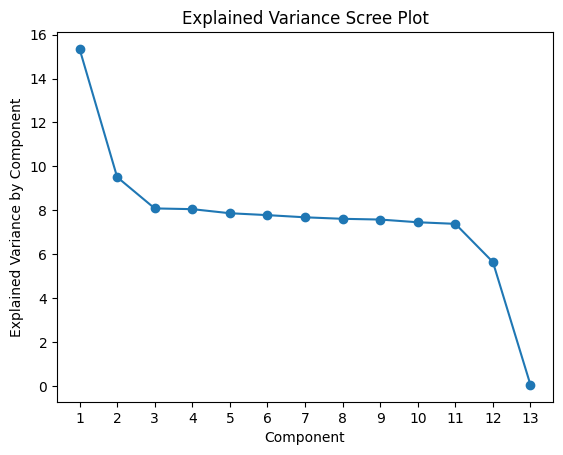

In [8]:
graph_range = range(1, len(variance_df) + 1)

# eigen plot
# plt.plot(graph_range, variance_df["Eigenvalues"], marker = "o")
# plt.xticks(graph_range)
# plt.xlabel('Components')
# plt.ylabel('Eigenvalue')
# plt.title("Scree Plot (Kaiser Criterion)")
# plt.axhline(y=1, color='red')
# plt.show()

# variance elbow plot
plt.plot(graph_range, variance_df['Variance_Percentage'], marker = "o")
plt.xticks(graph_range)
plt.xlabel('Component')
plt.ylabel('Explained Variance by Component')
plt.title("Explained Variance Scree Plot")
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; As shown by the chart, PC1 explains a lot of variance, PC2 explains a decent
amount of variance, and components 3-11 explain similar percentages. The graph takes a
sharp bend after the eleventh component so abiding by the elbow rule I will eliminate the
last two components. These remaining eleven components explain 94% of the variance in
the data.</p>
<h4>3. Variance of Each Component</h4>
<p>&nbsp; &nbsp; The variance of each component is as follows:
<ul>
<li>PC1: 15.35%</li>
<li>PC2: 9.51%</li>
<li>PC3: 8.08%</li>
<li>PC4: 8.05%</li>
<li>PC5: 7.86%</li>
<li>PC6: 7.78%</li>
<li>PC7: 7.68%</li>
<li>PC8: 7.61%</li>
<li>PC9: 7.48%</li>
<li>PC10: 7.45%</li>
<li>PC11: 7.38%</li>
</ul></p>
<h4>4. Total Variance Captured by Components</h4>
<p>&nbsp; &nbsp; The total variance of the eleven principal components is 94.32%</p>

In [9]:
print("\nPCA Variance Data Frame:")
print(variance_df)


PCA Variance Data Frame:
    Eigenvalues  Variance_Percentage  Cumulative_Percentage
1         1.995               15.348                 15.348
2         1.236                9.508                 24.855
3         1.051                8.082                 32.937
4         1.046                8.049                 40.986
5         1.022                7.863                 48.849
6         1.011                7.777                 56.625
7         0.998                7.677                 64.303
8         0.989                7.609                 71.912
9         0.985                7.575                 79.487
10        0.969                7.452                 86.939
11        0.959                7.379                 94.318
12        0.733                5.640                 99.958
13        0.005                0.042                100.000


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>5. Summary of Data Analysis</h4>
<p>&nbsp; &nbsp; Referring back to A1, I was able to reduce dimensionality of the data by two
components while still retaining 94% accuracy. When looking at the loadings matrix and
the explained variance of the components it is evident that a customer’s tenure and their
annual bandwidth usage has the strongest influence on the first component which in itself
accounts for 15.35% of the variance, the most of any component. The elbow rule was
chosen over the kaiser criterion because the kaiser criterion would have resulted in keeping
six components with only 56.63% of variance explained which I believed to be too
inaccurate. In conclusion, a principal component analysis is a great tool for reducing data
sizes and explaining which variables provide the strongest weights that account for the
most variance.</p>
<h2>Part V: Attachments</h2>
<h3>E. Sources for Third-Party Code</h3>
<p>Centellegher, S. (2020, January 27). How to compute PCA loadings and the loading matrix
with scikit-learn. Simone Centellegher, PhD - Data Scientist and Researcher.
<a href="https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html">
https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html</a>

GeeksforGeeks. (2021, December 19). How to Standardize Data in a Pandas DataFrame?
GeeksforGeeks. https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/

Saturn Cloud. (2023, June 19). How to Suppress Scientific Notation in Pandas.
SaturnCloud. https://saturncloud.io/blog/how-to-suppress-scientific-notation-in-pandas/
</p>
<h3>F. Sources</h3>
<p>Freie Universität Berlin. (n.d.). Choose Principal Components. <a href="https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Principal-Component-Analysis/PCA-the-basics/Choose-Principal-Components/index.html">https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Principal-Component-Analysis/PCA-the-basics/Choose-Principal-Components/index.html</a>

Jaadi, Z. (2024, February 23). Principal Component Analysis (PCA): A Step-by-Step
Explanation. Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis</p>